# Importando as bibliotecas

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Definindo uma função que gera uma circunferência e uma que verifica se um dado está dentro das asas

In [28]:
def circunferencia(x_centro, y_centro, raio, x, y):
    return (x - x_centro)**2 + (y - y_centro)**2 - raio**2

def dentro_das_asas(x, y):
    circ1 = circunferencia(1, 0, 1, x, y) <= 0
    circ2 = circunferencia(-1, 0, 1, x, y) <= 0
    circ3 = circunferencia(0, 1, 1, x, y) <= 0
    circ4 = circunferencia(0, -1, 1, x, y) <= 0
    return (circ1 and circ3) or (circ1 and circ4) or (circ2 and circ3) or (circ2 and circ4)

# Gerando dados aleatórios, criando classes e treinando a random forest (200 árvores)

In [29]:
#Geração dos dados aleatórios
np.random.seed(0)
n_points = 1000
X_data = np.random.uniform(-1, 1, (n_points, 2))

#Classes
y_data = np.array([1 if dentro_das_asas(x, y) else 2 for x, y in X_data])
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

#Treino
clf = RandomForestClassifier(random_state=0, n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

# Plot do gráfico da região e os pontos

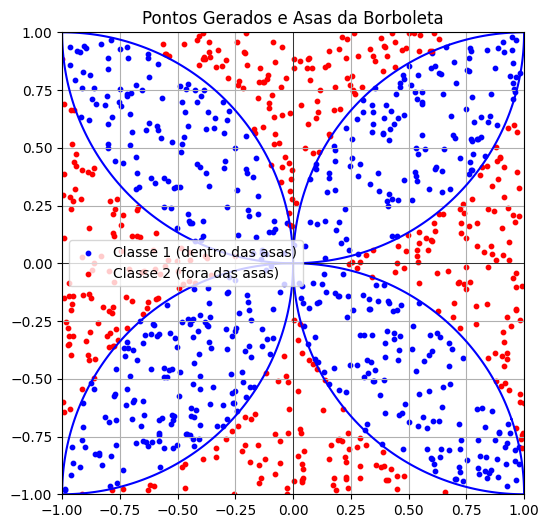

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(X_data[y_data == 1][:, 0], X_data[y_data == 1][:, 1], c='blue', label='Classe 1 (dentro das asas)', s=10)
plt.scatter(X_data[y_data == 2][:, 0], X_data[y_data == 2][:, 1], c='red', label='Classe 2 (fora das asas)', s=10)

# Circunferências
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
circ1 = circunferencia(1, 0, 1, X, Y)
circ2 = circunferencia(-1, 0, 1, X, Y)
circ3 = circunferencia(0, 1, 1, X, Y)
circ4 = circunferencia(0, -1, 1, X, Y)
plt.contour(X, Y, circ1, levels=[0], colors='blue')
plt.contour(X, Y, circ2, levels=[0], colors='blue')
plt.contour(X, Y, circ3, levels=[0], colors='blue')
plt.contour(X, Y, circ4, levels=[0], colors='blue')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Pontos Gerados e Asas da Borboleta')
plt.legend()
plt.grid(True)
plt.show()

# Matriz de confusão e relatório de classificação

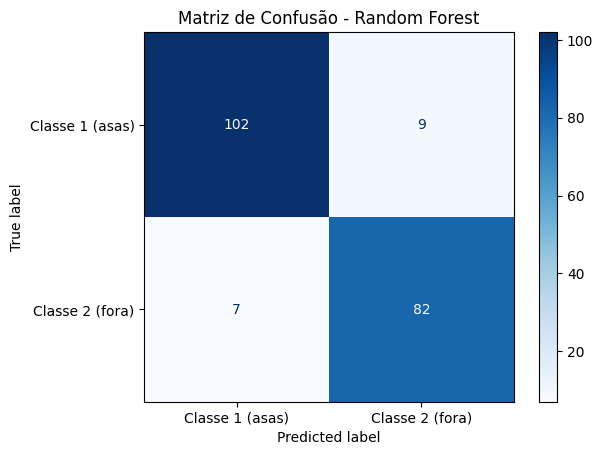

In [31]:
confusionMatrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=["Classe 1 (asas)", "Classe 2 (fora)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Random Forest")
plt.show()


In [32]:
print(classification_report(y_val, y_pred, target_names=["Classe 1 (asas)", "Classe 2 (fora)"]))

                 precision    recall  f1-score   support

Classe 1 (asas)       0.94      0.92      0.93       111
Classe 2 (fora)       0.90      0.92      0.91        89

       accuracy                           0.92       200
      macro avg       0.92      0.92      0.92       200
   weighted avg       0.92      0.92      0.92       200

